# This section focuses on data cleaning and manipulation   


In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import filedialog
from tkinter.messagebox import showinfo
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk)
import seaborn as sns
%matplotlib notebook
import csv
from csv import DictReader
import json
import pandas as pd

#use pandas to read the data
airport = pd.read_csv('airports.csv')
runways = pd.read_csv('runways.csv')
freq = pd.read_csv('airport-frequencies.csv')

# creating a new csv file excluding data with word 'closed'
airport_without_closed = airport[airport['type'] != 'closed']

#display only GB airports without closed 'type'
airport_GB = airport[airport['iso_country'] == 'GB'].merge(airport_without_closed)

#merge airports, runways and the frequencies files
airport_GB_merged = pd.merge(airport_GB,freq, left_on = 'ident', right_on = 'airport_ident')

#filtering out small airports
small_airports = airport_GB_merged[airport_GB_merged['type_x'] == 'small_airport']
small_airports.loc[:,['name', 'type_x','frequency_mhz','ident'] ]

#converting small_airport into a column
small_ap_crosstab = pd.crosstab([small_airports.name,small_airports.ident,small_airports.frequency_mhz]
                                , small_airports.type_x)
small_ap_crosstab

#filter medium airports data
medium_airports = airport_GB_merged[airport_GB_merged['type_x'] == 'medium_airport']
medium_airports.loc[:,['name', 'type_x','frequency_mhz','ident'] ]

#converting medium_airport into a column
medium_ap_crosstab = pd.crosstab([medium_airports.name,medium_airports.ident,medium_airports.frequency_mhz]
                                , medium_airports.type_x)
medium_ap_crosstab

#filter large_airport data
large_airports = airport_GB_merged[airport_GB_merged['type_x'] == 'large_airport']
large_airports.loc[:,['name', 'type_x','frequency_mhz','ident'] ]

#converting large_airport into a column
large_ap_crosstab = pd.crosstab([large_airports.name,large_airports.ident,large_airports.frequency_mhz]
                                , large_airports.type_x)
large_ap_crosstab


#filter columns to display
airport_files = airport_GB_merged.loc[:, ['name','ident','type_x','frequency_mhz']]

#convert airport type into columns and fill in their respective frequencies
cross_tab = pd.crosstab( [airport_files.name,airport_files.frequency_mhz],airport_files.type_x)
                            
# #counting how many airports by frequecies
#droping the heliport type 
cross_tab.drop('heliport', inplace=True, axis = 1)
cross_tab.reset_index(inplace=True)
cross_tab.fillna(0,inplace=True)


#over 92% of all airports use freq of more than 100
cross_tab.describe()

#filtering airports with freqeuncies of more than 100mhz
high_freq = cross_tab [cross_tab['frequency_mhz'] > 100]
high_freq['frequency_mhz'].median()

#finding out the most used frequnecy, mean and the mode
small_ap_crosstab.reset_index(inplace = True)
cross_tab['small_airport'].value_counts()
cross_tab.describe()
large_ap_crosstab.reset_index(inplace = True)

# this displays which airports are using 135.475 which is the mode frequency
mode_freq = cross_tab[cross_tab['frequency_mhz'] == 135.475]

#Analysing medium airports data
medium_ap_crosstab.reset_index(inplace = True)
high_freq_medium = medium_ap_crosstab[medium_ap_crosstab['frequency_mhz'] >200].count()
medium_ap_crosstab.describe()

#analysing small airports data
small_ap_crosstab.describe()

#using Seaborn for data visualization
#making a csv file for to store small airport data
file = small_ap_crosstab.to_csv('small_airport_freq')
data = pd.read_csv('small_airport_freq')
# small_airport_graph = sns.scatterplot(data = data, y = 'frequency_mhz', x='small_airport')
# small_airport_graph.set_title('Airport frequecies and the number of small airports using them')
# small_airport_graph.set_xlabel('Number of small airports')


#creating a dataframe containing large ariports datafor display in GUI
large_ap_crosstab.to_csv('large_airports_data')
file = pd.read_csv('large_airports_data')
file

#analysing the large airports data 
large_ap_crosstab.describe()
large_ap_crosstab[large_ap_crosstab['frequency_mhz'] <100]
large_ap_crosstab['frequency_mhz'].mean()
large_ap_crosstab['frequency_mhz'].median()
large_ap_crosstab['frequency_mhz'].mode()

 # visualizing correlation of data
cross_tab.to_csv('clean_airport_data', index = False)
cleaned_ap_data = pd.read_csv('clean_airport_data')
corr = cleaned_ap_data.describe()
corr = cleaned_ap_data.corr()
corr.style.background_gradient(cmap='coolwarm')



# data_heat_map = sns.heatmap(corr, annot = True)
# plt.show()
# #creating a plot
#  # create a figure
# figure = Figure(figsize=(6, 4), dpi=100)
# # create axes
# axes = figure.add_subplot()

#  # create the scatterplot
# x = data['small_airport']
# y = data['frequency_mhz']
# axes.scatter(x,y)
# axes.set_title('Communication frequencies and the the Number of small airports')
# axes.set_xlabel('Number of Small airports')
#print(large_ap_crosstab.corrwith(medium_ap_crosstab, axis  = 0))
cross_tab.corr()

medium_ap_crosstab[medium_ap_crosstab['frequency_mhz'] > 500]
corr = cleaned_ap_data.corr()

corr.style.background_gradient(cmap='Reds')

## This section focuses on the GUI using Tkinter

<IPython.core.display.Javascript object>


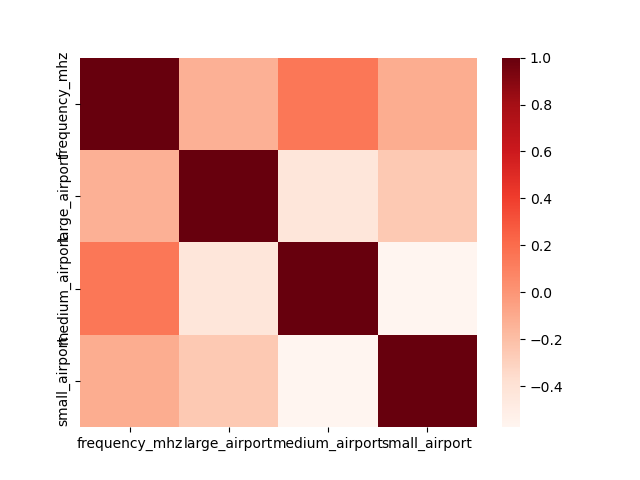

In [1]:
import csv
from csv import DictReader
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure 
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo
import seaborn as sns
from tkinter import messagebox
from tkinter import ttk
from matplotlib.backends.backend_tkagg import *
%matplotlib notebook


#creating a class for displaying the tkinter windwo with data
class Airport_frequecies(Tk):
    
    def __init__(self):
        super(Airport_frequecies,self).__init__()
        
        self.title('AIRPORTS FREQUENCY DATA')
        self.minsize(1100,700)
        #self.wm_iconbitmap("myicon.ico")
        
        #create frame to oragnice the widgets
        self.grid_columnconfigure(0,weight=1)
        self.grid_rowconfigure(0, weight=1) 
        self.main_frame = Frame(self,height=1100,width= 700, bg = 'light grey')
        self.main_frame.grid(row=0, column=0, sticky = 'nsew')
        
        #frame to hold file folders
        self.frame = Frame(self.main_frame, bg = 'grey')
        self.frame.grid(row=0, column=0,sticky = NW)
        
        #frame to hold data input
        self.frame2= LabelFrame(self.main_frame,height=200, width=400,bg = 'grey')
        self.frame2.grid(row=1, column=0, sticky = W)
        
        # frame to hold statistcal functions
        self.frame1 = LabelFrame(self.main_frame, text='Analytics',height=300, width=200, bd=5, relief=RIDGE)
        self.frame1.grid(row=0, column=4, sticky=NE, padx=20)
        
        #dispalying the menu function
        self.create_menu()
        
        #dispalying the add file function
        #self.add_text()
        
        #disaplying the correlation visualization
        self.figure = self.heat_map()
        self.figure.set_tight_layout(True)
        self.canvas = FigureCanvasTkAgg(self.figure)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row = 10, column = 5, sticky  = SE)
       

        # button to click for the small airports data visualization
        self.file_button = Button(self.frame1,text  = 'Small Airport Data',
                                  command = self.small_ap_radio_btn).grid(column = 0, row = 0)
        
        #button for displaying statistical analysis of large airports
        self.file_button2 = Button(self.frame1,text  = 'Large Airport Data',
                                  command = self.large_ap_radio_btn).grid(column = 1, row = 0)

 

  # function to allow user to add data to the files
    def add_text(self):
        airport_size_label = Label(self.frame2,borderwidth = 2,width =20,relief="solid"
                                   , text="Size of airport:")
        ap_size = ttk.Entry(self.frame2) 
        airport_name = Label(self.frame2, text="Name of airport: ",borderwidth = 2
                             ,width =20,relief="solid",)
        Name = ttk.Entry(self.frame2)
        commn_frequecy = Label(self.frame2, text="Communication frequency:",borderwidth = 2
                               ,width =20,relief="solid")
        freq = ttk.Entry(self.frame2)

 
        airport_size_label.grid(row=4, column=0)
        ap_size.grid(row=4,column=1)
        airport_name.grid(row=5,column=0)
        Name.grid(row=5, column=1)
        commn_frequecy.grid(row=6, column=0)
        freq.grid(row=6, column=1)
        
         #this will submit the added information and call the save function to save the dat
        submit = Button(self.frame2,text='Submit', command = self.save_file).grid(row=7, column=1)
        searchby_btn = Button(self.frame2,text='ADD TO FILE',).grid(row=3, column=0)

#    #function to load csv files
    def airport_csv_file(self):
        file_name = fd.askopenfilename(initialdir = '.', title="Select file", filetypes=(("CSV Files","*.csv"),))
            
        if file_name:
            csv = pd.read_csv(file_name)

            print(csv)
    # function to load the cleaned data in a JSON format        
    def upload_json(self):
        file_name = fd.askopenfilename(initialdir = '.',title="Select file",
                                       filetypes=(("JSON Files","*.json"),))
        if file_name:
            json = pd.read_json(file_name)
            print(json)
    
    #function to save files
    def save_file(self):
    #Save the current file as a new file.
        filepath = fd.asksaveasfilename(defaultextension='json',filetypes=[('Json Files', '*.json')
                                                                           , ('All Files', '*.*')],)
   
        if not filepath:
            return
        with open(filepath, "w") as output_file:
            text = txt_edit.get(1.0, tk.END)
            output_file.write(text)
    
    #function to exit the application
    def win_exit(self):
        self.quit()
        self.destroy()
        exit()
    
    #the menus will call the file open,save and edit functions
    def create_menu(self):
        #menubutton for CSV files
        menu_button1=  Menubutton (self.frame, text="CSV FILES", relief=RAISED )
        menu_button1.grid(row = 0, column = 0)
        menu_button1.menu =  Menu ( menu_button1, tearoff = 0 )
        menu_button1["menu"] =  menu_button1.menu
        
        #menu buttonfor JSON files
        menu_button2=  Menubutton (self.frame, text="JSON FILES", relief=RAISED )
        menu_button2.grid(row = 0, column = 1)
        menu_button2.menu =  Menu ( menu_button2, tearoff = 0 )
        menu_button2["menu"] =  menu_button2.menu
        
        #functions for csv Files
        menu_button1.menu.add_command(label = 'Open file', command = self.airport_csv_file )
        menu_button1.menu.add_command(label = 'Save file', command = self.save_file )
        menu_button1.menu.add_command(label = 'Add file', command = self.add_text)
        menu_button1.menu.add_command(label = 'Exit', command  = self.win_exit )
        
        #functions for JSON files
        menu_button2.menu.add_command(label = 'Open file', command = self.upload_json)
        menu_button2.menu.add_command(label = 'Save file', command = self.save_file )
        menu_button2.menu.add_command(label = 'Add file', command = self.add_text)
        menu_button2.menu.add_command(label = 'Exit', command  = self.win_exit )
        

   
    #this will visualise the small aiport data plot with scatter plot in a new window
    def small_airport_graph(self):
        global figure
        top= Toplevel()
        top.geometry("600x500")
        top.title('Small Airports Scatter Plot')
        data = pd.read_csv('small_airport_freq')
        
         # create a figure
        figure = Figure(figsize=(6, 4), dpi=100)

        # create FigureCanvasTkAgg object
        figure_canvas = FigureCanvasTkAgg(figure,top)

        # create the toolbar
        NavigationToolbar2Tk(figure_canvas, top)

        # create axes
        axes = figure.add_subplot()

        # create the scatterplot
        x = data['small_airport']
        y = data['frequency_mhz']
        axes.scatter(x,y)
        axes.set_title('Communication frequencies and the the Number of small airports')
        axes.set_xlabel('Number of Small airports')

        figure_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        #option to view small airport data as a bar plot
    def small_ap_bar_graph(self):
        global figure
        top= Toplevel()
        top.geometry("600x500")
        top.title('Small Airports Bar Plot')
        data = pd.read_csv('small_airport_freq')
        
         # create a figure
        figure = Figure(figsize=(6, 4), dpi=100)

        # create FigureCanvasTkAgg object
        figure_canvas = FigureCanvasTkAgg(figure,top)

        # create the toolbar
        NavigationToolbar2Tk(figure_canvas, top)

        # create axes
        axes = figure.add_subplot()

        # create the scatterplot
        x = data['small_airport']
        y = data['frequency_mhz']
        axes.bar(x,y)
        axes.set_title('Communication frequencies and the the Number of small airports')
        axes.set_xlabel('Number of Small airports')

        figure_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
     
    
    # data correlation visualization
    def heat_map(self):
        
        # reading the aiports data to ve visualised
        cleaned_ap_data = pd.read_csv('clean_airport_data')
        cleaned_ap_data['frequency_mhz'].mean()
        corr = cleaned_ap_data.corr()
        
        data_heat_map = sns.heatmap(corr, annot = True,cmap='Reds' ,fmt='g'
                                  ,xticklabels=True, yticklabels=True)
        

        plt.title('Aiport Size and Communication Frequecny Correlation Matrix')
       
        return data_heat_map.figure
        
    def sel(self):
        selection = "Result:  " + str(self.var.get())
        self.var.set(selection)

        #function for selecting large airports data statistics
    def large_ap_radio_btn(self):
        #reading the data for the stastical analysis
        large_ap_data = pd.read_csv('large_airports_data')
        mean = large_ap_data['frequency_mhz'].mean()
        median = large_ap_data['frequency_mhz'].median()
        mode = large_ap_data['frequency_mhz'].mode()
        
        # a float variable to hold the mean, mode and median values
        self.var = tk.DoubleVar()
        
        # a radiobution holding the mean value
        R1 = ttk.Radiobutton(self.frame1, text='MEAN', variable=self.var, value=mean,
                  command=self.sel).grid(row = 10, column = 1)
       
          # a radiobution holding the median value
        R2 = ttk.Radiobutton(self.frame1, text='MEDIAN', variable=self.var, value=median,
                  command=self.sel).grid(row = 11, column = 1)
        
        # a radiobution holding the mede value
        R3 = ttk.Radiobutton(self.frame1, text='MODE', variable=self.var, value=mode,
                  command=self.sel).grid(row = 12, column = 1)
        
         #a lebel to dispaly the results
        self.label = Label(self.frame1, textvariable=self.var).grid(row = 13, column = 1)
        
#   Function to dispaly overall statics for the data
    def data_plot(self):
        options = var1.get()
        
        
     #A radio buttuon command for small airport plot display    
    def small_ap_radio_btn(self):
        self.var1 = tk.IntVar()
        R1 = ttk.Radiobutton(self.frame1, text='Scatter plot', variable=self.var1, value=1,
                  command=self.small_airport_graph).grid(row = 10, column = 0)
        R2 = ttk.Radiobutton(self.frame1, text='Bar plot', variable=self.var1, value=2,
                  command=self.small_ap_bar_graph).grid(row = 11, column = 0)
       
       


        
    

if __name__ == "__main__":    
    window = Airport_frequecies()  
 
    mainloop()


## This section shows converting the Cleaned CSV file to JSON format

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import filedialog
from tkinter.messagebox import showinfo
import seaborn as sns
%matplotlib notebook
import csv
from csv import DictReader
import json
import pandas as pd

#coverting the cleaned DataFrame with merged Files into  CSV file
cross_tab.to_csv('Airports_plus_frequencies.csv',index = None)
file_airports = pd.read_csv('Airports_plus_frequencies.csv')

#reading the CSV file to arange it into key-value pair using dictreader function
with open('Airports_plus_frequencies.csv', 'r') as f:
    reader = csv.reader(f)
    data  = []
    for row in reader:
        
        data.append({'name':row[0],'frequency_mhz':row[1],'large_airport':row[2]
                     ,'medium_airport':row[3],'small_airport':row[4]})
        print(data)
#this creates the json file
with open('Airports_json_file.json', 'w') as json_file:
    json.dump(data, json_file, indent = 1 )
  


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
button1=Button(root,text='5 seconds',command=threading.Thread(target=five_seconds).start())

        #functions for JSON files
        menu_button2.menu.add_command(label = 'Open file', command = threading.Thread(self.upload_json).start())
        menu_button2.menu.add_command(label = 'Save file', command = threading.Thread(self.save_file).start())
        menu_button2.menu.add_command(label = 'Add file', command = threading.Thread(self.add_text).start())